<a href="https://colab.research.google.com/github/jubin-k/Fake-News-Detection-NLP/blob/main/Fake_News_Detection_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**


In [163]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import TweetTokenizer
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Importing Data**

In [164]:
df=pd.read_csv("/content/train.csv")
df

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"
...,...,...,...
10235,3,There are a larger number of shark attacks in ...,"animals,elections"
10236,3,Democrats have now become the party of the [At...,elections
10237,2,Says an alternative to Social Security that op...,"retirement,social-security"
10238,1,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy"


**Labels - Represents various classes of Labels**

0 - Barely True

1 - False

2 - Half False

3 - Mostly True

4 - Not Known

5 - True

In [165]:
df.shape

(10240, 3)

In [166]:
df.columns

Index(['Labels', 'Text', 'Text_Tag'], dtype='object')

In [167]:
df.isna().sum()

Labels      0
Text        0
Text_Tag    2
dtype: int64

In [168]:
df.dropna(axis=0,inplace=True)

In [169]:
df.duplicated().sum()

8

In [170]:
df.drop_duplicates(inplace=True)

In [171]:
df

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"
...,...,...,...
10235,3,There are a larger number of shark attacks in ...,"animals,elections"
10236,3,Democrats have now become the party of the [At...,elections
10237,2,Says an alternative to Social Security that op...,"retirement,social-security"
10238,1,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy"


In [172]:
df['Label']=df['Labels'].map({0:'Barely True',1:'False',2:'Half False',3:'Mostly True',4:'not known',5:'True'})

Text(0, 0.5, '')

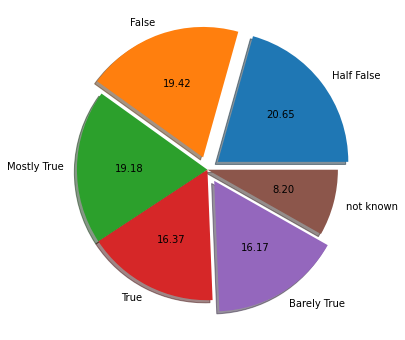

In [173]:
plt.figure(figsize=(12,6))
df['Label'].value_counts().plot(kind='pie',shadow=True,autopct='%.2f',explode=[0.1,0.1,0,0,0.1,0])
plt.ylabel('')

This pie chart basically shows that there's a 50% chance that the news you are reading is Fake!

In [174]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from PIL import Image

The wordclouds below shows which kind of news are mainly found to be Fake/True/Barely True/Half false/Mostly True.

Barely_True


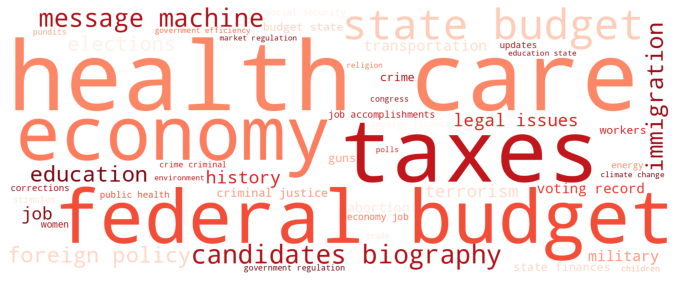

In [175]:
barely_true=' '.join(df[df['Labels']==0]['Text_Tag'])
cloud=WordCloud(width=1500,height=600,max_words=50,background_color='white',random_state=42,colormap='Reds_r').generate(str(barely_true))
plt.figure(figsize=(12,6))
plt.imshow(cloud)
plt.axis('off')
print('Barely_True')

False


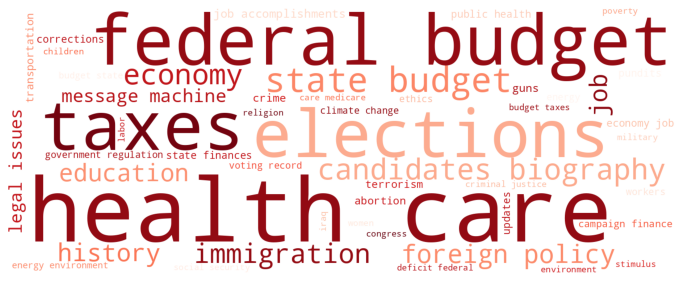

In [176]:
false=' '.join(df[df['Labels']==1]['Text_Tag'])
cloud=WordCloud(width=1500,height=600,max_words=50,background_color='white',random_state=42,colormap='Reds_r').generate(str(false))
plt.figure(figsize=(12,6))
plt.imshow(cloud)
plt.axis('off')
print('False')

Half_False


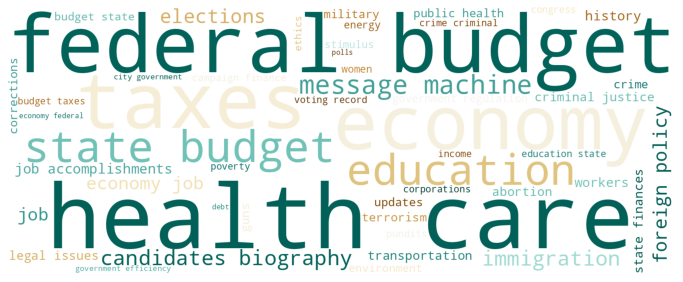

In [177]:
half_false=' '.join(df[df['Labels']==2]['Text_Tag'])
cloud=WordCloud(width=1500,height=600,max_words=50,background_color='white',random_state=42,colormap='BrBG_r').generate(str(half_false))
plt.figure(figsize=(12,6))
plt.imshow(cloud)
plt.axis('off')
print('Half_False')

Mostly_True


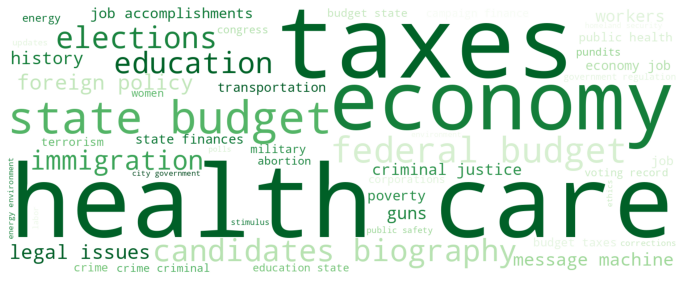

In [178]:
mostly_true=' '.join(df[df['Labels']==3]['Text_Tag'])
cloud=WordCloud(width=1500,height=600,max_words=50,background_color='white',random_state=42,colormap='Greens_r').generate(str(mostly_true))
plt.figure(figsize=(12,6))
plt.imshow(cloud)
plt.axis('off')
print('Mostly_True')

Not_Known


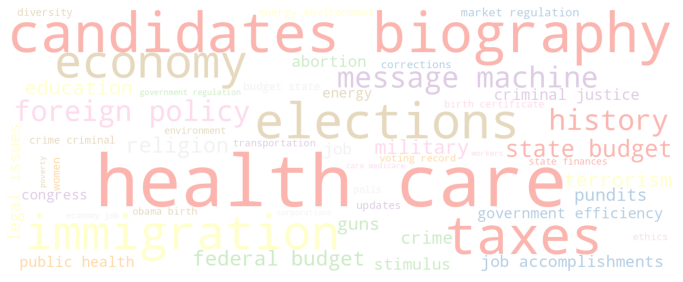

In [179]:
not_known=' '.join(df[df['Labels']==4]['Text_Tag'])
cloud=WordCloud(width=1500,height=600,max_words=50,background_color='white',random_state=42,colormap='Pastel1').generate(str(not_known))
plt.figure(figsize=(12,6))
plt.imshow(cloud)
plt.axis('off')
print('Not_Known')

True


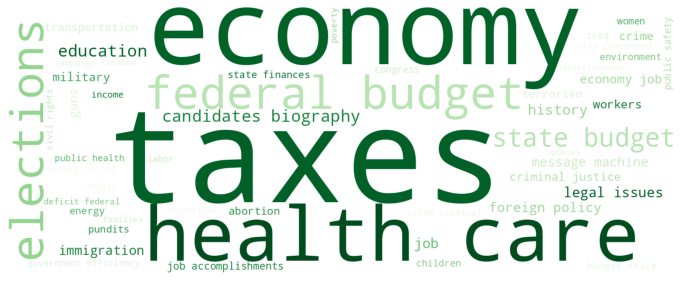

In [180]:
true=' '.join(df[df['Labels']==5]['Text_Tag'])
cloud=WordCloud(width=1500,height=600,max_words=50,background_color='white',random_state=42,colormap='Greens_r').generate(str(true))
plt.figure(figsize=(12,6))
plt.imshow(cloud)
plt.axis('off')
print('True')

In [181]:
df['Text_Tag'].unique()

array(['abortion', 'energy,history,job-accomplishments', 'foreign-policy',
       ..., 'animals,elections', 'retirement,social-security',
       'florida,foreign-policy'], dtype=object)

In [182]:
df.replace("[^A-Za-z0-9]"," ",regex=True,inplace=True)

In [183]:
news=df.Text
news

0        Says the Annies List political group supports ...
1        When did the decline of coal start  It started...
2        Hillary Clinton agrees with John McCain  by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
                               ...                        
10235    There are a larger number of shark attacks in ...
10236    Democrats have now become the party of the  At...
10237    Says an alternative to Social Security that op...
10238    On lifting the U S  Cuban embargo and allowing...
10239    The Department of Veterans Affairs has a manua...
Name: Text, Length: 10230, dtype: object

In [184]:
tokens=TweetTokenizer()
news=news.apply(lambda x:' '.join(tokens.tokenize(x.lower())))
news

0        says the annies list political group supports ...
1        when did the decline of coal start it started ...
2        hillary clinton agrees with john mccain by vot...
3        health care reform legislation is likely to ma...
4        the economic turnaround started at the end of ...
                               ...                        
10235    there are a larger number of shark attacks in ...
10236    democrats have now become the party of the atl...
10237    says an alternative to social security that op...
10238    on lifting the u s cuban embargo and allowing ...
10239    the department of veterans affairs has a manua...
Name: Text, Length: 10230, dtype: object

In [185]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(2,2))
cv.fit(news)
news=cv.transform(news)

In [186]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200,criterion='entropy')
model.fit(news,df['Labels'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [187]:
df_test=pd.read_csv("/content/test.csv")
df_test

,Text,Text_Tag
0,Building a wall on the U.S.-Mexico border will...,immigration
1,Wisconsin is on pace to double the number of l...,jobs
2,Says John McCain has done nothing to help the ...,"military,veterans,voting-record"
3,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti..."
4,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti..."
...,...,...
1262,Says his budget provides the highest state fun...,education
1263,Ive been here almost every day.,"civil-rights,crime,criminal-justice"
1264,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history"
1265,Says an EPA permit languished under Strickland...,"environment,government-efficiency"


In [188]:
Headlines=df_test['Text']
Headlines=Headlines.apply(lambda x:' '.join(tokens.tokenize(x.lower())))

In [189]:
Headlines=Headlines.apply(lambda x:' '.join(str(x) for x in tokens.tokenize(x)))

In [190]:
Headlines=cv.transform(Headlines)

In [191]:
print(Headlines)

  (0, 13040)	1
  (0, 44299)	1
  (0, 50874)	1
  (0, 71435)	1
  (0, 78559)	1
  (0, 81225)	1
  (1, 22136)	1
  (1, 38016)	1
  (1, 47960)	1
  (1, 50728)	1
  (1, 53091)	1
  (1, 71558)	1
  (1, 73470)	1
  (1, 74440)	1
  (1, 81371)	1
  (2, 22017)	1
  (2, 31703)	1
  (2, 39407)	1
  (2, 43680)	1
  (2, 47701)	1
  (2, 62019)	1
  (2, 72242)	1
  (2, 74618)	1
  (3, 12229)	1
  (3, 27319)	1
  :	:
  (1264, 74618)	1
  (1265, 13410)	1
  (1265, 22011)	1
  (1265, 30141)	1
  (1265, 36100)	1
  (1265, 46692)	1
  (1265, 61814)	1
  (1265, 76519)	1
  (1266, 2902)	1
  (1266, 5794)	1
  (1266, 6717)	1
  (1266, 8490)	1
  (1266, 19475)	1
  (1266, 30483)	1
  (1266, 33335)	1
  (1266, 36361)	2
  (1266, 36392)	1
  (1266, 37861)	1
  (1266, 42480)	1
  (1266, 62266)	1
  (1266, 68145)	1
  (1266, 68237)	1
  (1266, 71082)	1
  (1266, 72056)	1
  (1266, 79549)	1


In [192]:
y_pred=model.predict(Headlines)
y_pred

array([1, 5, 3, ..., 3, 1, 1])

In [193]:
df_test['Labels']=y_pred
df_test

,Text,Text_Tag,Labels
0,Building a wall on the U.S.-Mexico border will...,immigration,1
1,Wisconsin is on pace to double the number of l...,jobs,5
2,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",3
3,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",1
4,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",1
...,...,...,...
1262,Says his budget provides the highest state fun...,education,2
1263,Ive been here almost every day.,"civil-rights,crime,criminal-justice",3
1264,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history",3
1265,Says an EPA permit languished under Strickland...,"environment,government-efficiency",1
